<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/API_203MA_Sec1_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-203MA Review Session #1
**Friday, March 3**

TF: Matthew Dodier

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercises](#Exercises)

# Lecture Recap

## Quasi-Experimental Design

* Quasi-experimental or non-experimental methods attempt to identify causal effects when randomization is not feasible. We will explore several quasiexperimental methods in the coming weeks. For each of them, we must consider:

1. **Internal Validity (Quality):** how close does this method get us to approximating the true counterfactual?

  a) What assumptions are required for this approximation to be valid?

  b) What alternative explanations for the "effects" that we observe still remain?

2. **External validity (Relevance):** How is the external validity of our results affected by this method?

  a) Are we only making inferences about a subset of the observations in our data?
  
  b) What assumptions are required to be able to generalize further?

## Fixed Effects

**Introduction to Fixed Effects**

* Our goal: Get the causal effect of $X$ on $Y$
  * Problem: OVB arising from unobservable or unmeasurable variables that we can not control for in our regression
* Why fixed effects? Sources of bias
* We may be concerned about omitted variable bias (OVB) from *unmeasurable* ways in which groups are different from each other
  * For example, families who enroll their children in Head Start might be different in many ways from families who do not.
  * Boston school district may be different compared to other school districts

___

* Assume we want to measure impact of treatment $X$ for individual $i$ in group $g$:
  $$
  Y_{i g}=\beta_0+\beta_1 X_{i g}+\varepsilon_{i g}
  $$
* But we know that groups differ from each other in important ways that may be correlated wit the treatment $X$.
* We therefore run this regression with dummies for each group (except one):
$$
Y_{i g}=\beta_0+\beta_1 X_{i g}+\lambda_1 \operatorname{Group} 1+\lambda_2 \operatorname{Group} 2+\ldots+\varepsilon_{i g}
$$
* Or, more briefly:
$$
Y_{i g}=\beta_0+\beta_1 X_{i g}+\lambda_g+\varepsilon_{i g}
$$
* Those dummy variables are the "fixed effects".

___

* We can only use fixed effects when our data has multiple observations per "group"
  * Multiple schools within each district
  * People observed over multiple time periods (i.e., panel/longitudinal data)
* Fixed effects allow us to compare outcomes across observations within each group
  * Making comparisons within groups, and not across groups, may eliminate important sources of OVB

___

* Fixed effects is a multivariate regression technique that allows us to control for all measured and unmeasured sources of variation between groups
  * Idea is to control for differences between groups
  * This is the reason FE is such a powerful tool - it controls for all the difference that exist between groups, even though we may not know precisely what it is about those each group that may be generating the OVB!

* The reason to use FE within a (multivariate) regression is that we might not: 
  * Know what needs to be controlled for (i.e., we don't know what the true PRF is)
  * Be able to measure well what needs to be controlled for
* Fixed effects will control for factors that **differ across groups** but **not** factors that differ across individuals **within the same group.**

___

Interpreting coefficient with fixed effect

* Interpretation of coefficients must clarify that these regressions are comparing observations within the same groups, not across groups.
  * The slope coefficient $\beta_1$ tells us the average within-group change in $Y$ associated with a one-unit within-group change in $X$.
* Comparison is being done within the group (not across groups).
* Generally, we don't care about the coefficient in front of the dummy variables $\lambda_g$.
  * We just use the fixed effects as controls to get a more valid estimate of $\beta_1$



**Example: Class Size in School Districts**
* Many schools in one school district
* District-level fixed effects control for how well-run districts are, etc.
* In a regression of TestScores on ClassSize with district fixed effects, the coefficient on ClassSize is the average change in test scores due to class size increasing by 1

* How should we think about this?
  * Some school districts will be better run, have more funding, etc.
  * So for the same class size, they will have higher test scores
* However, test scores will be estimated to change by the same amount $\left(\beta_1\right)$ within any district when class size increases by 1
$$
\text { TestScores }_{i d}=\beta_0+\beta_1 \text { ClassSize }_i+\alpha_1 \text { District 1}+\alpha_2 \text { District 2}+\cdots+\varepsilon_{i d}
$$

or 

$$
\text { TestScores }_{i d}=\beta_0+\beta_1 \text { ClassSize }_i+\alpha_d+\varepsilon_{i d}
$$

  * $\beta_1$ is the change in Test Scores due to a 1-unit increase in Class Size, holding district constant (e.g. within a given district)

  * Including district FEs subtracts out average class size and average test score within district, centering data

  * Then, we estimate relationship on centered data 



**Fixed Effects: Takeaways**

* Fixed effects allow us to control for some types of confounding variables even when those variables are **unobservable**
* The key is to have **multiple observations** within a given unit (state, district, family, etc.).
* If you believe that the most important sources of omitted variable bias are eliminated by **fixed effects**
  * Then we can use causal language
* Be aware, however, that there will always be **other unobserved factors** that could explain your results. Ask yourself:
  * How **important** are those other factors?
  * Are they **correlated** with the variable of interest?

## Difference-in-differences

* We will consider the relatively simple but highly useful framework of difference-in-difference regressions
  * Diff-in-Diff
  * DiD
* Typically, this approach is used to estimate the impact of a policy change
  * where the policy only applies to some particular "treatment" group

Introduction

* Basic setup and data requirements:
* Two groups
1. Treatment group (affected by the policy change)
2. Control group (unaffected by the policy change)
* Two time periods
1. Before the policy change
2. After the policy change
* We will illustrate the use of this technique with a study by Card and Krueger (1994) on the impact of minimum wage on employment

### Diff-in-diff: Means Comparison

* Policy question: impacts of minimum wage on employment?
* QUESTION:Why can we not estimate the causal impact by regressing state-level employment on an indicator for whether a state has high minimum wage?
  * Host of factors which differ across high versus low minimum wage states and which determine employment (e.g. income) $\rightarrow$ OVB
* To eliminate sources of omitted variable bias, Card and Krueger (1994) used a Diff-in-Diff approach
* They study what happened when New Jersey raised their minimum wage, in April 1992
  * From $\$ 4.25$ to $\$ 5.05$ per hour
* Monthly survey of employment at fast-food restaurants
  * before the policy change, and
  * after the policy change

___

* The empirical challenge that DiD is trying to overcome:
  * What the change in employment would have been in NJ, had NJ never changed its minimum wage policy.

* How would a Difference-in-Difference technique help us here?
  1. Find some other state with no policy change (control group)
  2. Use the change in employment in this state as the counterfactual change for NJ

___

* Formally, the Difference-in-Difference is:
$$
\mathrm{DID}=\left(\bar{Y}_{T 2}-\bar{Y}_{T 1}\right)\left[\left(\bar{Y}_{C 2}-\bar{Y}_{C 1}\right)\right.
$$
* First difference: [Treated State after] - [Treated State before]
* Second difference: [Control State after] - [Control State before]

___

* When does the DID capture the causal effect?
  * **Parallel Trends Assumption:** in the absence of a policy change, the treatment group (T) would have had the same mean change in outcomes (Y) as the control group (C)
* Note: Does not require the same level, only same change


* Since we cannot observe the NJ counterfactual...
  * we never know for sure if the parallel trends assumption is satisfied

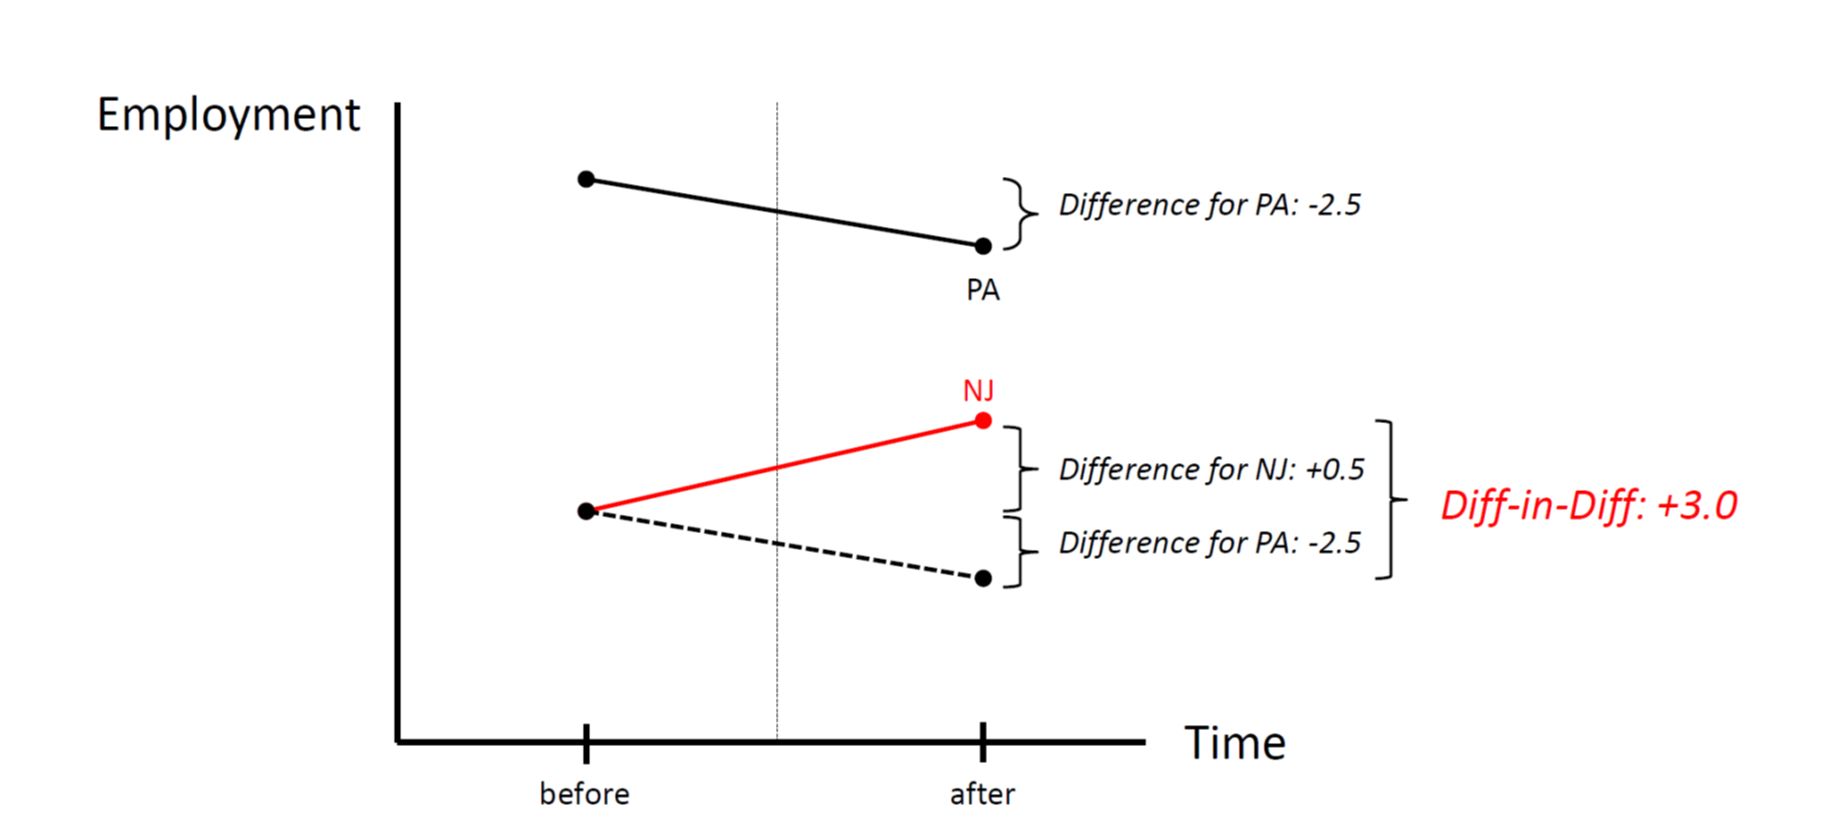

* What did Card and Krueger do?
  * Data from Pennsylvania (PA)
  * Fast-food restaurants close to the border to NJ
  * PA did not change the minimum wage at this time


* Note that the parallel trends assumption allows for:
  1. Time-invariant differences between NJ and PA 

  For example:
  * State-specific policies that DO NOT change over the study period
  * Socio-economic factors that DO NOT change over the study period
  * Geography

  2. Time-varying changes that are constant across NJ and PA
  * changes in federal policy
  * changes in national economic conditions
  * changes in global economic conditions

**QUESTION:** In your view, which of the following circumstances during this time period would be a violation of the parallel trends assumption?  

  a. The federal income tax was lowered during this time period

  b. A constant higher fraction of restaurants in NJ were in urban areas

  c. A constant higher fraction of restaurants in PA were in shopping malls

  d. The state corporate income tax was increased in PA but not in NJ

  e. All of the above

**ANSWER:**

  a. Time-varying factor that is common to NJ and PA: no violation

  b. NJ-specific but time-invariant factor: no violation

  c. PA-specific but time-invariant factor: no violation

  **d. PA-specific AND time-varying factor: violation**

Parrallel trends assumption (continued):
* If the parallel trends assumption is violated, the DID estimate will be biased
* However, if it is satisfied, we can use causal language
* Can we test whether the parallel trends assumption holds?
  * No, that's not possible!
* However, checking multiple time periods before the policy change is often useful
  * checking the "pre-trends"

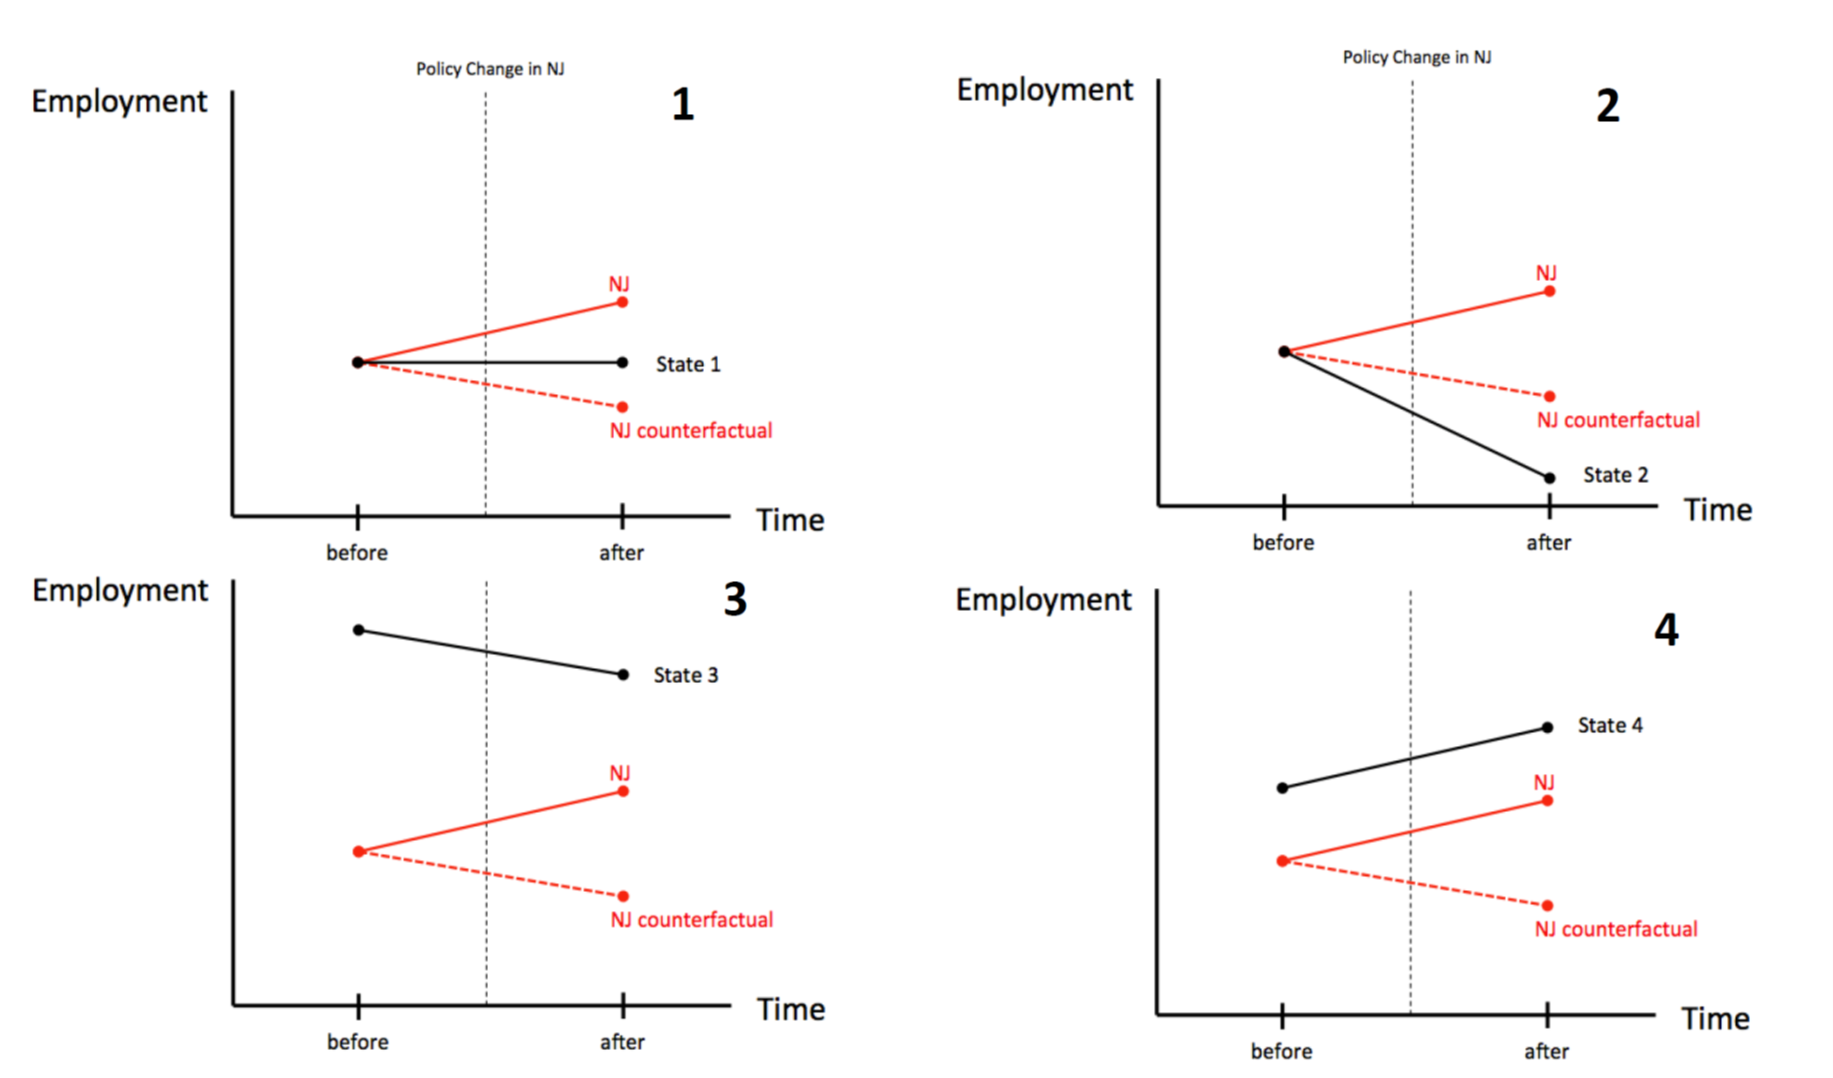

**QUESTION:** Which state satisfies the parallel trends assumption?

**ANSWER:** State 3 satisfies the parrallel trends assumption

### Diff-in-diff: Regression

* The Diff-in-Diff estimator can also be obtained by using the regression framework
* Regression framework allows us to:
  1. control for other variables
  2. test for statistical significance

$$
\text { Employees }=\beta_0+\beta_1 \text { NewJersey }+\beta_2 \text { After }+\beta_3 \text { NewJersey } * \text { After }+\varepsilon
$$

* The $\beta_3$ coefficient is the difference-in-difference estimate




DID estimator:
$$
\mathrm{DID}=\left(\bar{Y}_{T 2}-\bar{Y}_{T 1}\right)-\left(\bar{Y}_{C 2}-\bar{Y}_{C 1}\right)
$$

PRF:
$$
\text { Employees }=\beta_0+\beta_1 \text { NewJersey }+\beta_2 \text { After }+\beta_3 \text { NewJersey } * \text { After }+\varepsilon
$$

|              | Before                                      | After                                               | Difference                                                                    |
|--------------|---------------------------------------------|-----------------------------------------------------|-------------------------------------------------------------------------------|
| New Jersey   | $\beta_0+\beta_1$ ($\bar{Y}_{T 1}$)         | $\beta_0+\beta_1+\beta_2+\beta_3$ ($\bar{Y}_{T 2}$) | $\beta_2+\beta_3$ ($\bar{Y}_{T 2} - \bar{Y}_{T 1}$)                           |
| Pennsylvania | $\beta_0$ ($\bar{Y}_{C 1}$)                 | $\beta_0+\beta_2$ ($\bar{Y}_{C 2}$)                 | $\beta_2$ ($\bar{Y}_{C 2} - \bar{Y}_{C 1}$)                                   |
| Difference   | $\beta_1$ ($\bar{Y}_{T 1} - \bar{Y}_{C 1}$) | $\beta_1+\beta_3$ ($\bar{Y}_{T 2} - \bar{Y}_{C 2}$) | $\beta_3$ ($\bar{Y}_{T 2} - \bar{Y}_{T 1}$ - $\bar{Y}_{C 2} - \bar{Y}_{C 1}$) |

Diff-in-diff Takeaways:

* The difference-in-difference estimator is useful when you have:
  * two groups: a treatment and a control
  * two time 'periods': before and after
* It will provide a causal estimate if the parallel trends assumption holds
* Thus, when reading a study using this approach, think hard about this assumption!

# Exercises

## Part I: Fixed Effects

In this section, we are going to explore whether higher taxes on beer reduce traffic fatalities?
* Panel data on traffic fatalities over time \& across states with tax rate
* Source: Stock \& Watson, via Christopher Ruhm
* Key variables:
  * `state`: State ID (FIPS) Code
  * `year`: Year
  * `mrall_10k`: Vehicle Fatality Rate (VFR) per 10,000 people
  * `beertax`: Tax on Case of Beer

In [ ]:
library(tidyverse)

check_installed <- require(fixest)
if(check_installed==F){
  install.packages("fixest")
  require(fixest)
}

#load data
fatality <- read.csv("https://raw.githubusercontent.com/tsvoronos/API202-students/main/data/fatality.csv")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: fixest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘fixest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘Formula’, ‘numDeriv’, ‘sandwich’, ‘Rcpp’, ‘dreamerr’


Loading required package: fixest



In [ ]:
# counting the observations per year
fatality %>% count(year)

year,n
<int>,<int>
1982,48
1983,48
1984,48
1985,48
1986,48
1987,48
1988,48


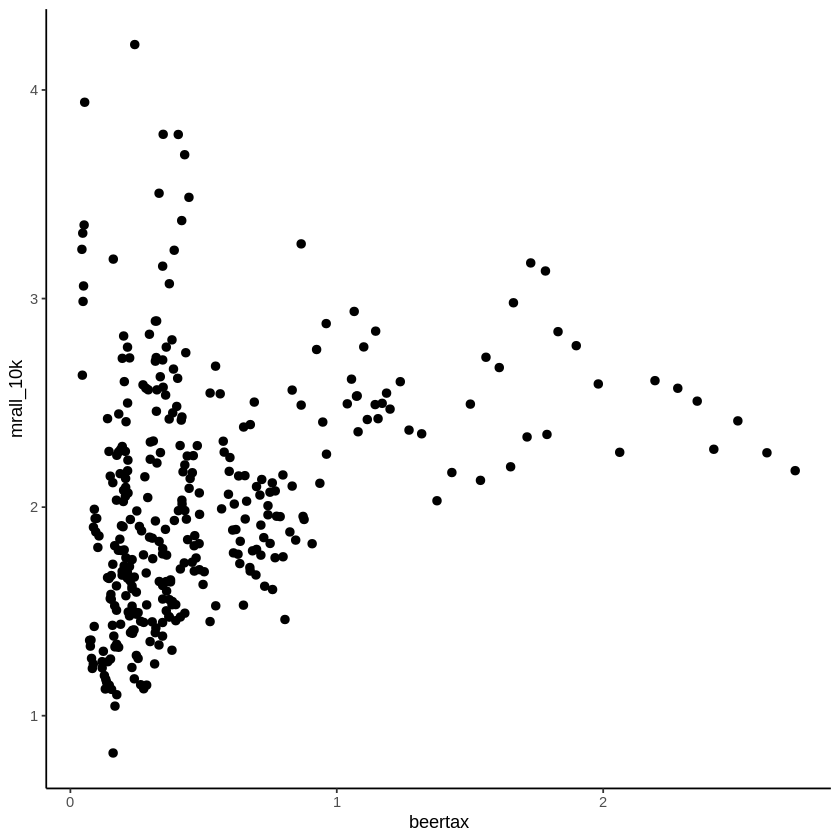

In [ ]:
# Visualizing the data

  # Plot beer tax versus fatality rate

  fatality %>% 
    ggplot(aes(x=beertax, y=mrall_10k)) +
    geom_point(size=2) +
    theme_classic()

**1. Let's run a simple regression of fatalities on beer tax without fixed effects. Do the results seem right? Why or why not?**

In [ ]:
# Your code here:

fatality %>% 
  lm(mrall_10k ~ beertax, data =.) %>% 
  summary()


Call:
lm(formula = mrall_10k ~ beertax, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09060 -0.37768 -0.09436  0.28548  2.27643 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.85331    0.04357  42.539  < 2e-16 ***
beertax      0.36461    0.06217   5.865 1.08e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5437 on 334 degrees of freedom
Multiple R-squared:  0.09336,	Adjusted R-squared:  0.09065 
F-statistic: 34.39 on 1 and 334 DF,  p-value: 1.082e-08


Your answer here:

These results do not seem right because the coefficient on beer tax is positive, in other words higher taxes on beer are associated with higher vehicle fatality rates.  Our prior would have been that increases taxes on beer would lower vehicle fatality rates since individuals may consume less alcohol as the cost of purchasing it increases and the resulting decrease in alcohol consumption leads to fewer traffic fatalites.

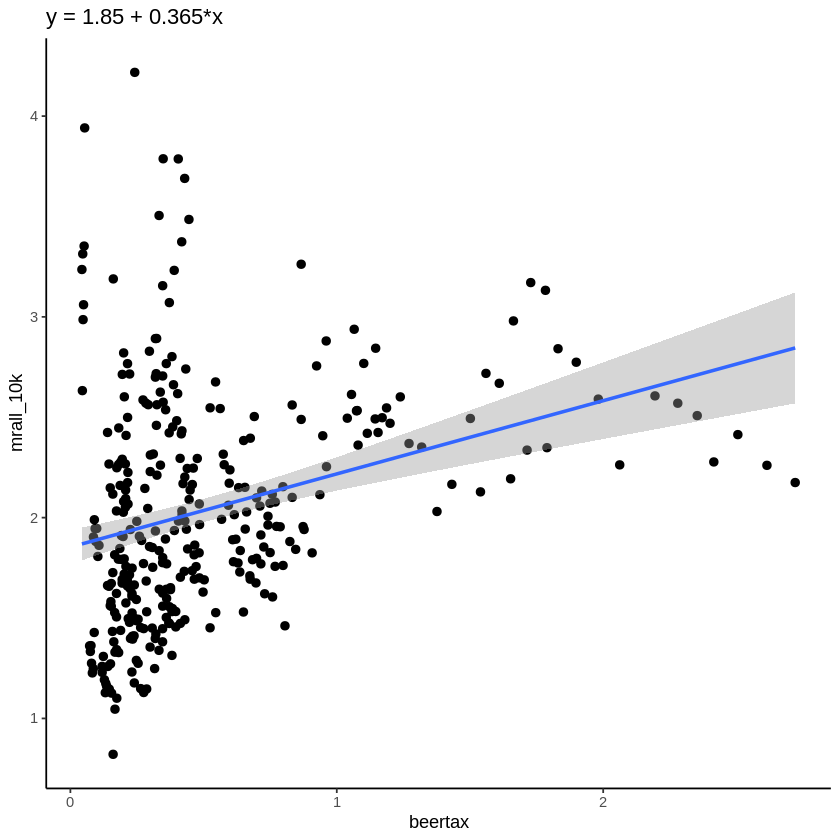

In [ ]:
# Visualizing the data again

  # Adding the simple reg. line with a CI to previous scatterplot
  model <- lm(mrall_10k~beertax,data=fatality)

  fatality %>% ggplot(aes(x=beertax,y=mrall_10k)) +
    geom_point(size=2) +
    geom_smooth(method='lm', formula= y~x) +
    labs(title = paste("y = ",signif(model$coef[[1]],3)," + ",
                      signif(model$coef[[2]], 3),"*x",sep="")) +
    theme_classic()

**2. Let's add state fixed effects to our previous regression.**

In [ ]:
# Your code here:

# fixed effects in R using lm
fatality %>% 
  feols(mrall_10k ~ beertax + factor(state), data =.) %>% 
  summary()

In [ ]:
# fixed effects in R using feols
fatality %>% 
  feols(mrall_10k ~ beertax | state, data =.) %>% 
  summary()

OLS estimation, Dep. Var.: mrall_10k
Observations: 336 
Fixed-effects: state: 48
Standard-errors: Clustered (state) 
         Estimate Std. Error  t value Pr(>|t|)    
beertax -0.655874   0.291856 -2.24725 0.029358 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.17547     Adj. R2: 0.889129
                Within R2: 0.040745

In this model with state fixed effects, we are comparing changes in beer tax rates to change in vehicle fatality rate (per 10,000 people) within states, holding constant all factors that are different across states but constant over time.

Note: you may have noticed that the standard errors differ if you used `feols()` instead of `lm()`.  That is because the two different R functions default options are using different standard errors.  Importantly, regardless of which 
R function you use to include fixed effects the estimated coefficients will be the same.

**3. Now let's add year fixed effects to the regression.**

In [ ]:
# Your code here:

# fixed effects in R using lm
fatality %>% 
  feols(mrall_10k ~ beertax + factor(state) + factor(year), data =.) %>% 
  summary()

In [ ]:
# fixed effects in R using feols
fatality %>% 
  feols(mrall_10k ~ beertax | state + year, data =.) %>% 
  summary()

OLS estimation, Dep. Var.: mrall_10k
Observations: 336 
Fixed-effects: state: 48,  year: 7
Standard-errors: Clustered (state) 
        Estimate Std. Error  t value Pr(>|t|)    
beertax -0.63998   0.357078 -1.79227 0.079528 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.171819     Adj. R2: 0.891425
                 Within R2: 0.036065

In this model with both state and year fixed effects, we are comparing changes in beer tax rates to changes in vehicle fatality rate (per 10,000 people) within states over time, holding constant all factors that are different across states but constant over time and all factors that are different over time but constant across states.

Caveats:
* The model does not, however, control for factors that are different across states and over time, including
  * Changes in state-specific policies over time
  * Changes in state-specific economic conditions over time
* Not controlling for such factors could lead to OVB
  * Example: increase in unemployment rate within specific states over time, could lead to more fatalities on the road and correlate with taxes

**4. Compare the results from the fixed effects regressions in questions 2 and 3 to the regression in question 1 without fixed effects.**

Your answer here:

In both fixed effects regression, the coefficient on beer tax is negative meaning an increase in taxes on a case of beer decreases vehicle fatality rates.  This contrasts with the results from the regression in question 1 where we found a positive association between beer taxes and vehicle fatalities.  

The difference in the signs of the coefficients is because of the fixed effects models in questions 2 and 3.  State fixed effects control for all factors that differ across state but are constant over time, while year fixed effects control for all factors that differ over time but are constant across states.  

More specific to this dataset, state fixed effects are controlling for factors such as state-specific cultural attitudes toward wearing drinking and driving, traffic conditions, population characteristics, etc.  Year fixed effects are controlling for any time-specific macro effects that shift the level of traffic fatalities for all states.  For example, national campaigns that affect the behaviors of drivers across the country (e.g., Mothers Against Drunk Driving).  When we don't include the fixed effects are regression suffer from substantial omitted variable bias resulting in the positive coefficient on beer tax.

## Part II: Difference-in-differences

In this section we are using data from Card and Krueger’s 1994 paper entitled <q>Minimum Wages and Employment: A Case Study of the Fast-Food Industry in New Jersey and Pennsylvania.</q>

The names and descriptions of the variables in the data set are shown below.
* `sheet`: Unique store ID
* `after`: An indicator for whether the employment measure was from after the minimum wage legislation was enacted in 1992. Equals 0 if before and equals 1 if after.
* `employees`: Number of employees per restaurant
* `NJ`: An indicator for whether the restaurant was in New Jersey. Equals 0 if in Pennsylvania and equals 1 if in New Jersey.

In [ ]:
#suppress warnings
options(warn =-1,dplyr.summarise.inform=FALSE)

library(tidyverse)
minimum_wage <- read.csv("https://raw.githubusercontent.com/tsvoronos/API202-students/main/data/minimum_wage.csv")

**1. Let’s run a simple regression to compare mean employment in the pre-period between the two states.**

**To run this regression, follow these steps: (1) Filter the minimum wage data to the period `after == 0`, (2) Run a linear regression of employees on NJ.**

**To interpret the results of your regression, recall that the coefficient on NJ represents the difference in means of New Jersey and Pennsylvania. The standard error on the coefficient can therefore be interpreted as the standard error of the difference in means. If the coefficient is zero, we would conclude that there was no difference in mean employment between New Jersey and Pennsylvania in the pre-period.**

**Would you reject the null hypothesis that the two states had the same average employment at the 5% significance level?**

In [ ]:
# Your code here:

summary(lm(employees ~ NJ, minimum_wage %>% filter(after == 0)))



Call:
lm(formula = employees ~ NJ, data = minimum_wage %>% filter(after == 
    0))

Residuals:
    Min      1Q  Median      3Q     Max 
-10.316  -5.715  -2.715   3.385  52.285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.3158     0.9894   10.43   <2e-16 ***
NJ           -2.6006     1.1020   -2.36   0.0188 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.626 on 390 degrees of freedom
Multiple R-squared:  0.01408,	Adjusted R-squared:  0.01155 
F-statistic: 5.569 on 1 and 390 DF,  p-value: 0.01877


Your answer here:

Since the p-value is 0.019 we can reject the null hypothesis at the 50% confidence level.

**2. Now, let’s compare employment after the legislation was enacted. We will again use a simple linear regression of employees on NJ, so copy your code from Question 1 but adjust the code to reflect that we are in the post-period.**

**Would you reject the null hypothesis that the two states had the same average employment at the 5% significance level?**

In [ ]:
# Your code here:

summary(lm(employees ~ NJ, minimum_wage %>% filter(after == 1)))


Call:
lm(formula = employees ~ NJ, data = minimum_wage %>% filter(after == 
    1))

Residuals:
   Min     1Q Median     3Q    Max 
-8.415 -6.415 -2.415  3.585 31.585 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.5724     0.9183   8.246 2.53e-15 ***
NJ            0.8422     1.0228   0.823    0.411    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.005 on 390 degrees of freedom
Multiple R-squared:  0.001736,	Adjusted R-squared:  -0.000824 
F-statistic: 0.6781 on 1 and 390 DF,  p-value: 0.4108


Your answer here:

Since the p-value is 0.41 we cannot reject the null hypothesis at the 5% significance level.

**3. In words (rather than notation), what is the counterfactual for Pennsylvania? What is the counterfactual for New Jersey? How would you define the treatment effect for Pennsylvania? Remember that you can never observe the treatment effect for a single unit, but you can define it in terms of potential outcomes. Answer this question in words rather than notation.**

Your answer:

The counterfactual for Pennsylvania is employment in the post-period if Pennsylvania had increased its minimum wage as New Jersey did. The counterfactual for NJ is employment in the post-period if NJ had NOT increased its minimum wage. The treatment effect for PA is the difference in post-period employment with the increased minimum wage minus employment without the increased minimum wage.

**4. Difference-in-differences is one way of estimating the treatment effect. What is the key assumption difference-in-differences makes in this setting? Do you think that is a fair assumption to make? Why or why not?**

Your answer:

The key assumption is that average employment in the fast food restaurants in the two states would have changed in the same way on average had there been no change in the NJ minimum wage. This assumption seems reasonable, because the two states are neighbors. However, without knowing more about the composition of the specific stores and other changes in legislation, I cannot be 100% sure that the assumption is valid.

**5. We will use linear regression to estimate difference-in-differences. Recall that to run a linear regression in R, we use `lm(y ~ x1 + x2 + x3, data = minimum_wage)`. Replace x1, x2, and x3 with the correct variables for this diff-in-diff regression and replace y with the outcome variable. Which coefficient captures the treatment effect? Is it positive or negative? What is the p-value for that coefficient? What is the real-world interpretation of the coefficient of interest?**

In [ ]:
# Your code here:

summary(lm(employees ~ NJ + after + after*NJ, data = minimum_wage))


Call:
lm(formula = employees ~ NJ + after + after * NJ, data = minimum_wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.316  -6.415  -2.493   3.585  52.285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.3158     0.9545  10.807   <2e-16 ***
NJ           -2.6006     1.0631  -2.446   0.0147 *  
after        -2.7434     1.3499  -2.032   0.0425 *  
NJ:after      3.4428     1.5035   2.290   0.0223 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.321 on 780 degrees of freedom
Multiple R-squared:  0.008409,	Adjusted R-squared:  0.004595 
F-statistic: 2.205 on 3 and 780 DF,  p-value: 0.08616


Your answer:

The coefficient on `after*NJ` captures the treatment effect. This coefficient is positive and its p-value is 0.02. The real-world interpretation is that increasing the minimum wage in NJ led to a statistically significant increase in average employment of 3.4 employees per store. 

**6. How does the conclusion in Question 5 align with what you found from the simple regressions in Questions 1 and 2? Provide an intuitive explanation that reconciles what you found using simple regressions with what you found using difference-in-differences.**

Your answer:

In Questions 1 and 2, I found that NJ had meaningfully lower employment than PA in the pre-period and comparable employment in the post-period. Naively, from those, I would have expected a treatment effect of 0.84 + 2.60 = 3.44, which is exactly the value estimated by the difference in differences equation. This makes sense, because the NJ coefficients in Questions 2 and 3 gave the differences between NJ and PA in each period and diff-in-diff takes the difference in differences, so subtracting the pre-period difference from the post-period difference is exactly what our treatment effect coefficient is doing.